# Demonstrating Pipe Flow Shear with Random Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(A):
    maxX = A.shape[0] #shape of all x and y values, need to define some A array
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX)) #making a copy??
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    %matplotlib inline 
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    fig = plt.figure(figsize=(10,10))
    plt.imshow(B, cmap='jet'); #Plasma, Purples, Blues also look nice
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.imsave(f'image1_{i}.png', B, cmap='jet', dpi=150)
    
    plt.pause(0.01)

In [3]:
nStrikes = 3
maxX = 250
maxY = 250

In [4]:
A = np.zeros((maxX, maxY))
for i in range(0,maxX):
    for j in range(0,maxY):
        A[i,j] = 0
A[:,0] = 255
A[:,maxY-1] = 255

print(A.transpose())

[[255. 255. 255. ... 255. 255. 255.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [255. 255. 255. ... 255. 255. 255.]]


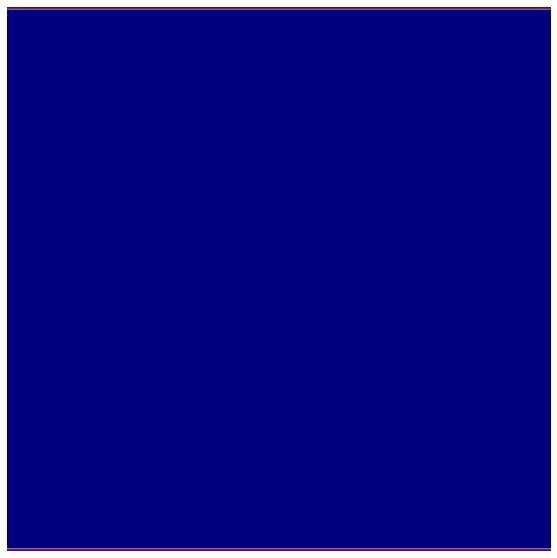

<Figure size 432x432 with 0 Axes>

In [5]:
display(A)

i= 0 	y=1


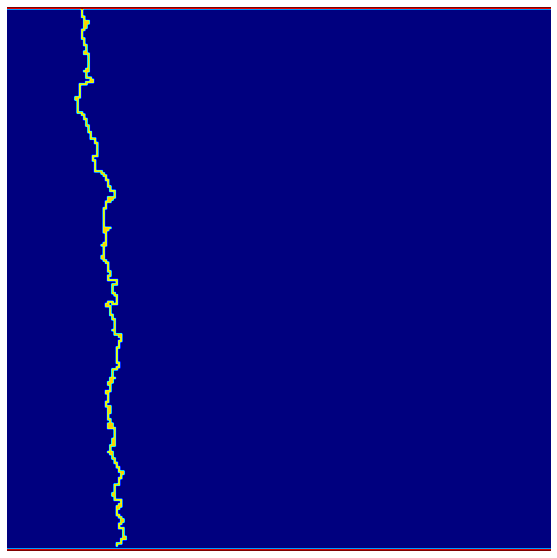

<Figure size 432x432 with 0 Axes>

i= 1 	y=1


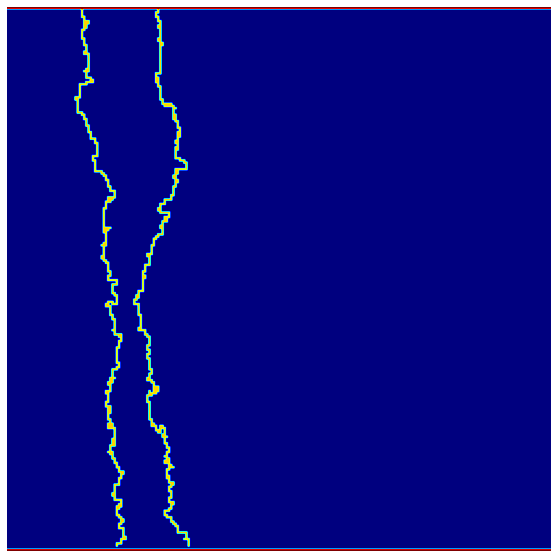

<Figure size 432x432 with 0 Axes>

i= 2 	y=1


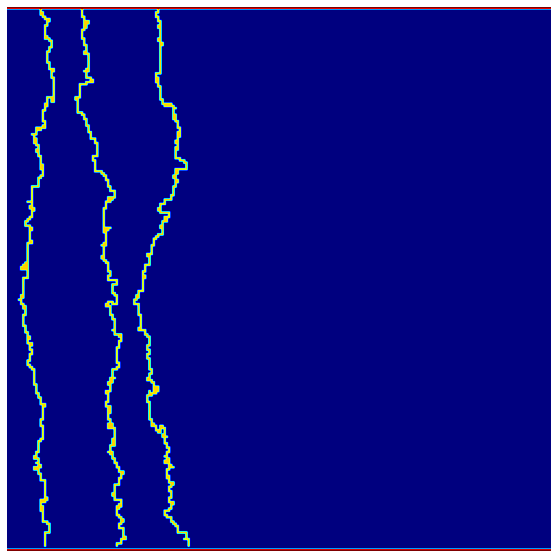

<Figure size 432x432 with 0 Axes>

In [6]:
fig = plt.figure()
for i in range(0,nStrikes):
    rr = np.random.random()
    xstart = int(rr*250); x = xstart
    ystart = (maxY-1); y = ystart

    while True:
        xOrg = x
        yOrg = y
        r = np.random.random();
        if r <= 0.20:
            x += 1 #right
        elif r > 0.20 and r <= 0.40:
            x -= 1 #left
        elif r > 0.40 and r <= 0.45:
            y += 1 # up
        else:
            y -= 1 # down

        #Periodic Boundary Conditions
        if x < 0: 
            x = maxX-1
        elif x == maxX:
            x = 0
        if y == maxY: #if y goes up the first move, we can just reset it back to its original position.
            y = yOrg

        if y == 0 or y == 1:
            break
        elif (A[x,y] == 175):
            if i%2 == 0:
                A[x,y] += 1
            else: 
                A[x,y] -= 1
            x = xOrg
            y = yOrg
            continue;


        xp = x + 1
        if xp == maxX:
            xp = 0
        xm = x - 1
        if xm == -1:
            xm = maxX - 1
        yp = y + 1
        ym = y - 1


        if (A[x,y] == 0):
                A[x,y] = 175 
                
    print(f'i= {i} \ty={y}')
    display(A)
    plt.imsave(f'image1_{i}.png', A) 